<a href="https://colab.research.google.com/github/khchoi-physik/pbh_simulations/blob/main/fem_test_peaks_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt

## 1D

[-0.47667321 -0.80378962 -0.52126339  0.48013087  2.88558987 -1.59042012
 -1.21161905  1.67148737 -1.12550315]
(array([4, 7]),)


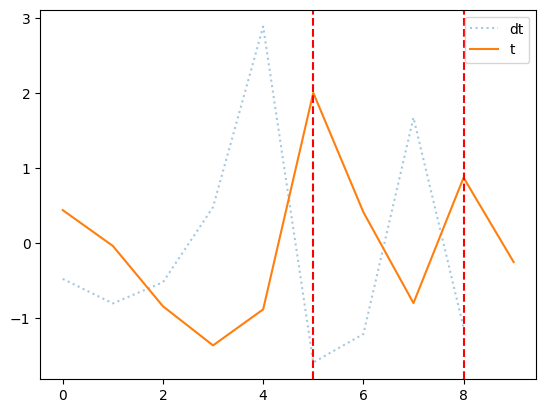

In [12]:
t= np.random.randn(10)
dt = t[1:] - t[:-1]
#print(t);
print(dt)
peaks = np.where(np.diff(np.sign(dt),axis=0)<0)
print(peaks)
peaks = peaks[0]

xrange = np.arange(len(t))
plt.plot(xrange[:-1],dt, label='dt', linestyle = ':', alpha=0.4)
plt.plot(xrange,t,label = 't')
for peak in peaks:
    plt.axvline(x=peak+1, color='r', linestyle='--')
    #plt.axvline(x=peak, color='b', linestyle=':')
plt.legend()

## 2D

In [95]:
# @title Method two using derivatives


mm=16
grf = np.random.randn(mm, mm)  # Replace with your actual grf array

grf= np.abs(grf)
cdx_grf = (grf[1: ,:] - grf[:-1, : ])
cdy_grf = (grf[:,1:] - grf[ :,:-1 ])

peaks_dx = np.where(np.diff(np.sign(cdx_grf),axis=0)<0)
peaks_dy = np.where(np.diff(np.sign(cdy_grf),axis=1)<0)

num_peaks_dx = len(peaks_dx[0])
num_peaks_dy = len(peaks_dy[0])

peaks_pos_x = np.array( [ [peaks_dx[0][n]+1,peaks_dx[1][n]] for n in range(num_peaks_dx)] )
peaks_pos_y = np.array( [ [peaks_dy[0][n],peaks_dy[1][n]+1] for n in range(num_peaks_dy)] )


peaks_set_x = set(map(tuple, peaks_pos_x))
peaks_set_y = set(map(tuple, peaks_pos_y))

peaks_2d_fem = peaks_set_y & peaks_set_x

print('Number of peaks found :', len(peaks_2d))
print(peaks_2d_fem)

Number of peaks found : 43
{(12, 7), (3, 7), (4, 6), (9, 2), (8, 9), (9, 8), (10, 3), (10, 9), (2, 14), (13, 14), (7, 7), (5, 3), (10, 5), (2, 1), (13, 1), (1, 11), (6, 1), (2, 10), (7, 12), (12, 2), (12, 11), (3, 5), (3, 11), (14, 5), (4, 10), (14, 11), (5, 5), (8, 4), (4, 13), (5, 8), (10, 13), (2, 3), (13, 3), (1, 13), (7, 2), (6, 9)}


In [96]:
# @title Method two by counts

peaks_2d = []
for nn in range(len(peaks_pos_x)):

    x,y = peaks_pos_x[nn][0], peaks_pos_x[nn][1]

    if y > 0 and y < grf.shape[1]-1:
        # if  cdy_grf[x,y-1] > 0 and cdy_grf[x,y] < 0:
        #     peaks_2d.append( [x,y] )

        if  grf[x,y]- grf[x,y+1] > 0 and grf[x,y]- grf[x,y-1]  > 0:
            peaks_2d.append( [x,y] )

print('Number of peaks found :', len(peaks_2d))
print(peaks_2d)

Number of peaks found : 36
[[1, 11], [1, 13], [2, 1], [2, 3], [2, 10], [2, 14], [3, 5], [3, 7], [3, 11], [4, 6], [4, 10], [4, 13], [5, 3], [5, 5], [5, 8], [6, 1], [6, 9], [7, 2], [7, 7], [7, 12], [8, 4], [8, 9], [9, 2], [9, 8], [10, 3], [10, 5], [10, 9], [10, 13], [12, 2], [12, 7], [12, 11], [13, 1], [13, 3], [13, 14], [14, 5], [14, 11]]


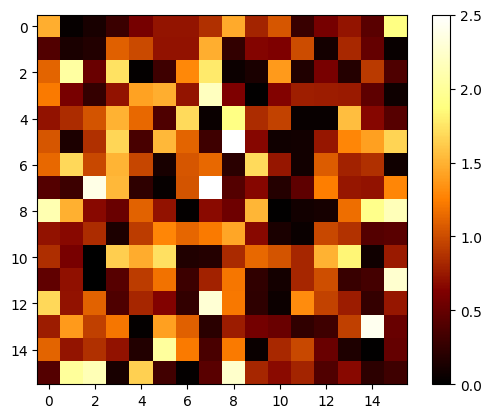

In [97]:
plt.imshow(grf, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()

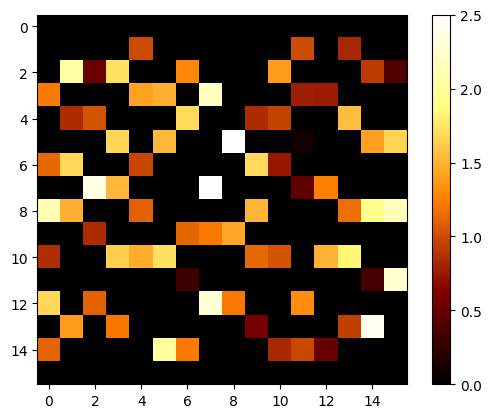

In [98]:
mask = np.zeros(grf.shape)

for (x,y) in peaks_pos_x:
    mask[x,y] =  grf[x,y]

plt.imshow(mask, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()

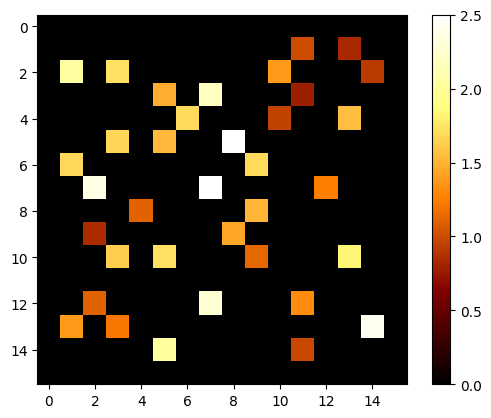

In [99]:
mask = np.zeros(grf.shape)

for (x,y) in peaks_2d:
    mask[x,y] =  grf[x,y]

plt.imshow(mask, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()

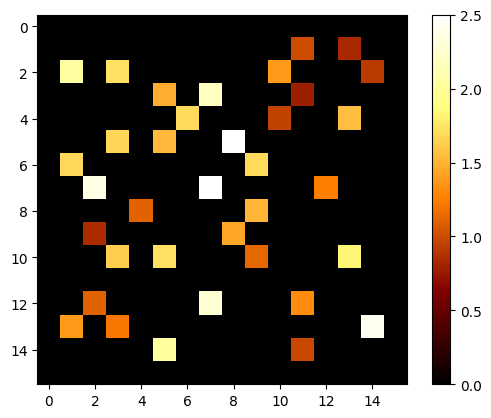

In [100]:
mask = np.zeros(grf.shape)

for (x,y) in peaks_2d_fem:
    mask[x,y] =  grf[x,y]

plt.imshow(mask, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()